In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Load your CSV file (adjust path if needed)
data = pd.read_csv(r"C:\Users\Rishabh\Desktop\diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


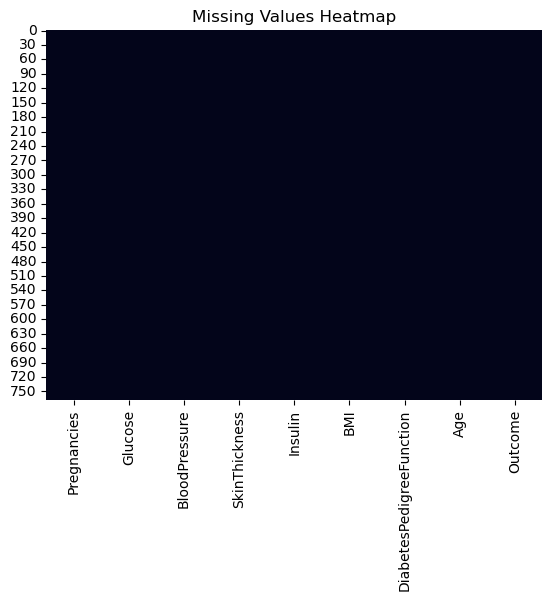

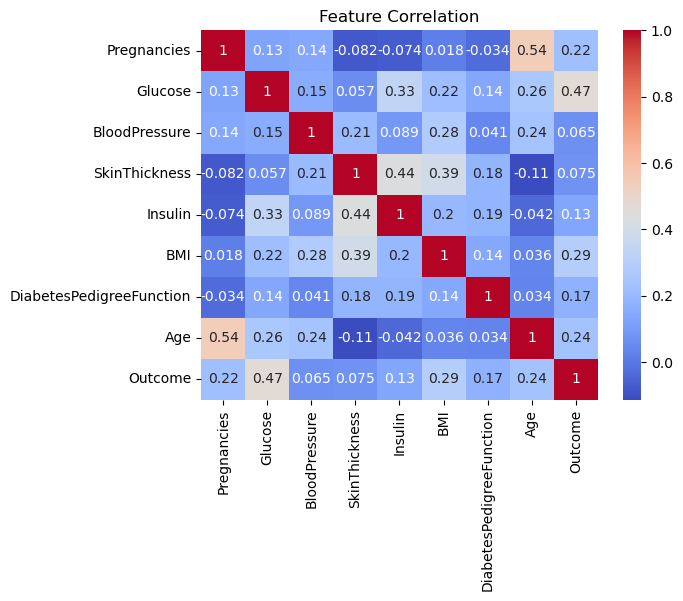

In [3]:
# Check for missing values
sns.heatmap(data.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [4]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)


In [5]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_preds = lr_model.predict(X_test)
lr_acc = accuracy_score(Y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_acc)

# SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)
svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_preds)
print("SVM Accuracy:", svm_acc)


Logistic Regression Accuracy: 0.7597402597402597
SVM Accuracy: 0.7727272727272727


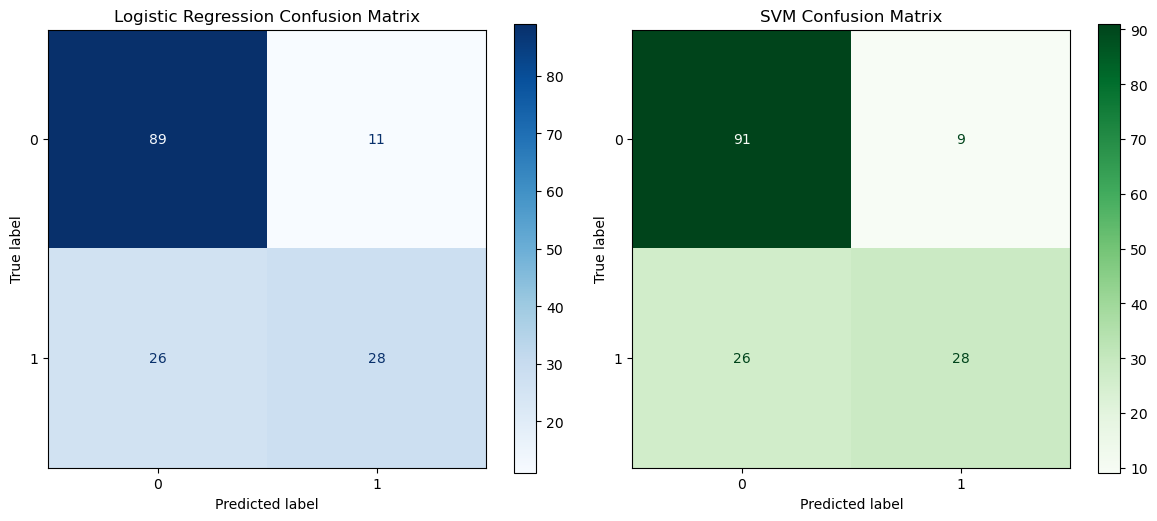

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, Y_test, ax=ax[0], cmap="Blues")
ax[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, Y_test, ax=ax[1], cmap="Greens")
ax[1].set_title("SVM Confusion Matrix")

plt.tight_layout()
plt.show()


In [9]:
# Replace with your input
input_data = (1,85,66,29,0,26.6,0.351,31)

# Convert to DataFrame with same columns as original data
input_df = pd.DataFrame([input_data], columns=X.columns)

# Scale input
input_scaled = scaler.transform(input_df)

# Make prediction
prediction = svm_model.predict(input_scaled)

# Output result
if prediction[0] == 0:
    print("The person is NOT diabetic")
else:
    print("The person IS diabetic")


The person is NOT diabetic
